In [1]:
import pandas as pd
import openpyxl
from openpyxl import Workbook
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우에서 사용 (리눅스에서는 'NanumGothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 제대로 표시되게 설정

In [16]:
sea_level = pd.read_csv('./data/sealevel.csv') # 해수면 관련 데이터 읽어들이기
sea_group = sea_level.groupby('Year').mean() # 월별로 있는 데이터 년도별로 묶은 후 반영
sea_group.head()

,TotalWeightedObservations,GMSL_noGIA,StdDevGMSL_noGIA,SmoothedGSML_noGIA,GMSL_GIA,StdDevGMSL_GIA,SmoothedGSML_GIA,SmoothedGSML_GIA_sigremoved
Year,,,,,,,,
1993,319044.908649,-34.605405,87.603784,-34.629459,-34.483784,87.607027,-34.507568,-34.508378
1994,323836.882162,-30.951081,87.412432,-30.898919,-30.584324,87.418919,-30.532432,-30.531892
1995,317986.154865,-28.645946,85.336757,-27.971351,-28.019459,85.337838,-27.359189,-27.358108
1996,323979.240278,-26.596389,84.194444,-26.140833,-25.744167,84.188611,-25.288611,-25.287222
1997,321345.634054,-22.682432,97.989189,-22.345946,-21.591081,98.000000,-21.254865,-21.255676


In [29]:
sea_difference = sea_group[['SmoothedGSML_GIA_sigremoved']]
sea_difference = sea_difference.rename(columns = {'SmoothedGSML_GIA_sigremoved' : '20년간 평균과의 차이(mm)'})
sea_difference.head()

,20년간 평균과의 차이
Year,
1993,-34.508378
1994,-30.531892
1995,-27.358108
1996,-25.287222
1997,-21.255676


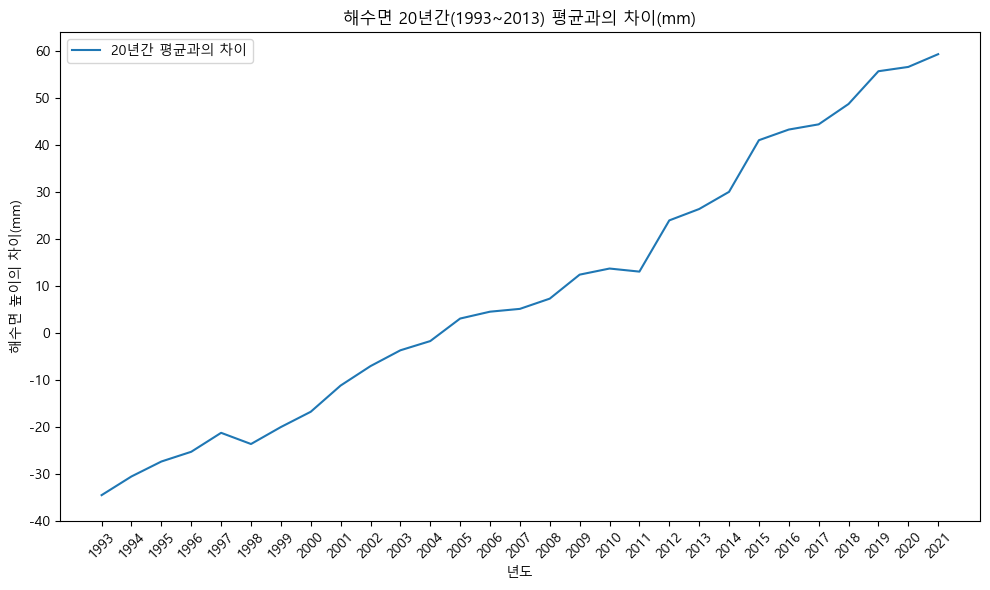

In [36]:
# 해수면 차이 라인 그래프 그리기
plt.figure(figsize = (10, 6))
sns.lineplot(data = sea_difference)

# 그래프 꾸미기
plt.title('해수면 20년간(1993~2013) 평균과의 차이(mm)')
plt.xlabel('년도')
plt.xticks(sea_difference.index)
plt.yticks([-40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60])
plt.ylabel('해수면 높이의 차이(mm)')
plt.xticks(rotation = 45)  # x축 년도 레이블 회전

# 그래프 표시
plt.tight_layout()
plt.show()

In [61]:
sea_temp_init = pd.read_csv('./data/바다온도.csv')
sea_temp_init.head()

,date,sst,clim_91-20,ano_91-20
0,1979-01-01,20.08,20.24,-0.15
1,1979-01-02,20.08,20.24,-0.16
2,1979-01-03,20.09,20.25,-0.16
3,1979-01-04,20.10,20.25,-0.15
4,1979-01-05,20.12,20.26,-0.14


In [62]:
sea_temp_init['date'] = pd.to_datetime(sea_temp_init['date']) # 년-월-일 형태로 있는 datetime형태라고 표시
sea_temperature = sea_temp_init[sea_temp_init['date'].dt.year >= 1993] # 1993년 이후 데이터만 반영
sea_temperature['date'] = sea_temperature['date'].dt.to_period('M') # 
sea_temperature.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_864\4246296515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sea_temperature['date'] = sea_temperature['date'].dt.to_period('M') #


,date,sst,clim_91-20,ano_91-20
5114,1993-01,19.99,20.24,-0.25
5115,1993-01,20.00,20.24,-0.24
5116,1993-01,20.01,20.25,-0.24
5117,1993-01,20.02,20.25,-0.23
5118,1993-01,20.03,20.26,-0.23


In [63]:
sea_temp_month = sea_temperature.groupby('date').mean()
sea_temp_month.head()

In [ ]:
# 'date' 컬럼을 datetime 형식으로 변환
sea_temperature['date'] = pd.to_datetime(sea_temperature['date'])

# 연도-월 형식으로 'date' 컬럼을 변환하여 새로운 컬럼 생성
sea_temperature['date'] = sea_temperature['date'].dt.to_period('M')

In [ ]:
sea_temperature['date'] = pd.to_datetime(sea_temperature['date']).dt.strftime('%Y-%m') # 데이터 형식을 일을 떼고 년-월까지만
sea_temperature.head()